In [304]:
# Provide a brief descriptio of the project and objectives

In [305]:
# Importing libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warningns related to version problems

import warnings
warnings.filterwarnings('ignore')

In [306]:
# Read CSV file

loan = pd.read_csv('loan.csv')

# Check the data types, shape and number of columns and rows in the data set
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


#### Data Quality
- Check data quality of rows and columns

In [307]:
# Checking for Duplicate rows in the dataset.
print('The number of duplicate rows in loan dataframe =', loan.duplicated().sum())

# Check for rows having all null values i.e rows with missing data
print('The number of rows with missing data =', loan.isnull().all(axis=1).sum())

# Check for columns having all nulll values i.e columns with missing data

print('The number of columns with all null values =', loan.isnull().all(axis=0).sum() )
print()


The number of duplicate rows in loan dataframe = 0
The number of rows with missing data = 0
The number of columns with all null values = 54



#### Insight/s

 - There are no duplicate rows in the loan dataframe
 - There are no rows with missing data
 - There are 54 columns which have all null values

#### Data Cleaning 
- Drop columns having all null values 

In [308]:
# Drop columns with all null values
print('Before drop: The number of columns in the loan dataframe =', loan.shape[1])
loan = loan.dropna(axis=1, how='all')
print('After drop: The number of columns in the loan dataframe =', loan.shape[1])

Before drop: The number of columns in the loan dataframe = 111
After drop: The number of columns in the loan dataframe = 57


In [309]:
# Calculate the number of unique values in the column
columns = loan.columns
num_unique_values = loan[columns].nunique()
num_unique_values

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [310]:
# Calculate the number of unique values in the column
columns = loan.columns
columns_having_1_unique_value = columns[loan[columns].nunique() == 1]
columns_having_1_unique_value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [311]:
print('Before drop: The number of columns in the data set = ', loan.shape[1])

# Drop the columns having one unique values since it doesn't impact the analysis
loan = loan.drop(columns_having_1_unique_value, axis=1)

print('After drop: The number of columns in the data set = ', loan.shape[1])


Before drop: The number of columns in the data set =  57
After drop: The number of columns in the data set =  48


In [312]:
print('Before drop: The number of columns in the data set = ', loan.shape[1])
# Explore the data available in all the column
# Set the max number of columns to display in Jupyter Notebook
pd.set_option('display.max_columns', None)
# Check the data in each column and select few to validate and take action
loan.head(2)
check = loan[['term','emp_length', 'issue_d', 'url', 'desc', 'title', 'last_pymnt_d', 'last_credit_pull_d']]
check.head()

#drop the following columns since these contains unstructured data
loan = loan.drop(['url', 'desc', 'title'], axis =1)
print('After drop: The number of columns in the data set = ', loan.shape[1])


Before drop: The number of columns in the data set =  48
After drop: The number of columns in the data set =  45


In [313]:
# Data Extraction
check = loan[['term','emp_length', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']]
check.head()

# Fill null values with 0
loan.term.fillna('0',inplace=True)
loan.emp_length.fillna('0',inplace=True)

In [314]:
# Extract digits from the "term" column
loan['term'] = loan['term'].str.extract('(\d+)').astype(int)

# Extract digits from the "emp_length" column
loan['emp_length'] = loan['emp_length'].str.extract('(\d+)').astype(int)

In [315]:
# Remove % symbol from int_rate and revol_until column
loan['int_rate']=loan['int_rate'].str.rstrip('%')
loan['revol_util']=loan['revol_util'].str.rstrip('%')

# Converting to numeric data
columns1=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[columns1]=loan[columns1].apply(pd.to_numeric)


In [316]:
# Data Clean on pub_rec_bankruptcies column
print('Before cleanup null values')
print(loan.pub_rec_bankruptcies.isnull().sum())

# Replace 'Not Known' with NA values
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('After cleanup null values')
print(loan.pub_rec_bankruptcies.isnull().sum())

Before cleanup null values
697
After cleanup null values
0


In [291]:
# Selecting and manipulating data based on the business case 

#### 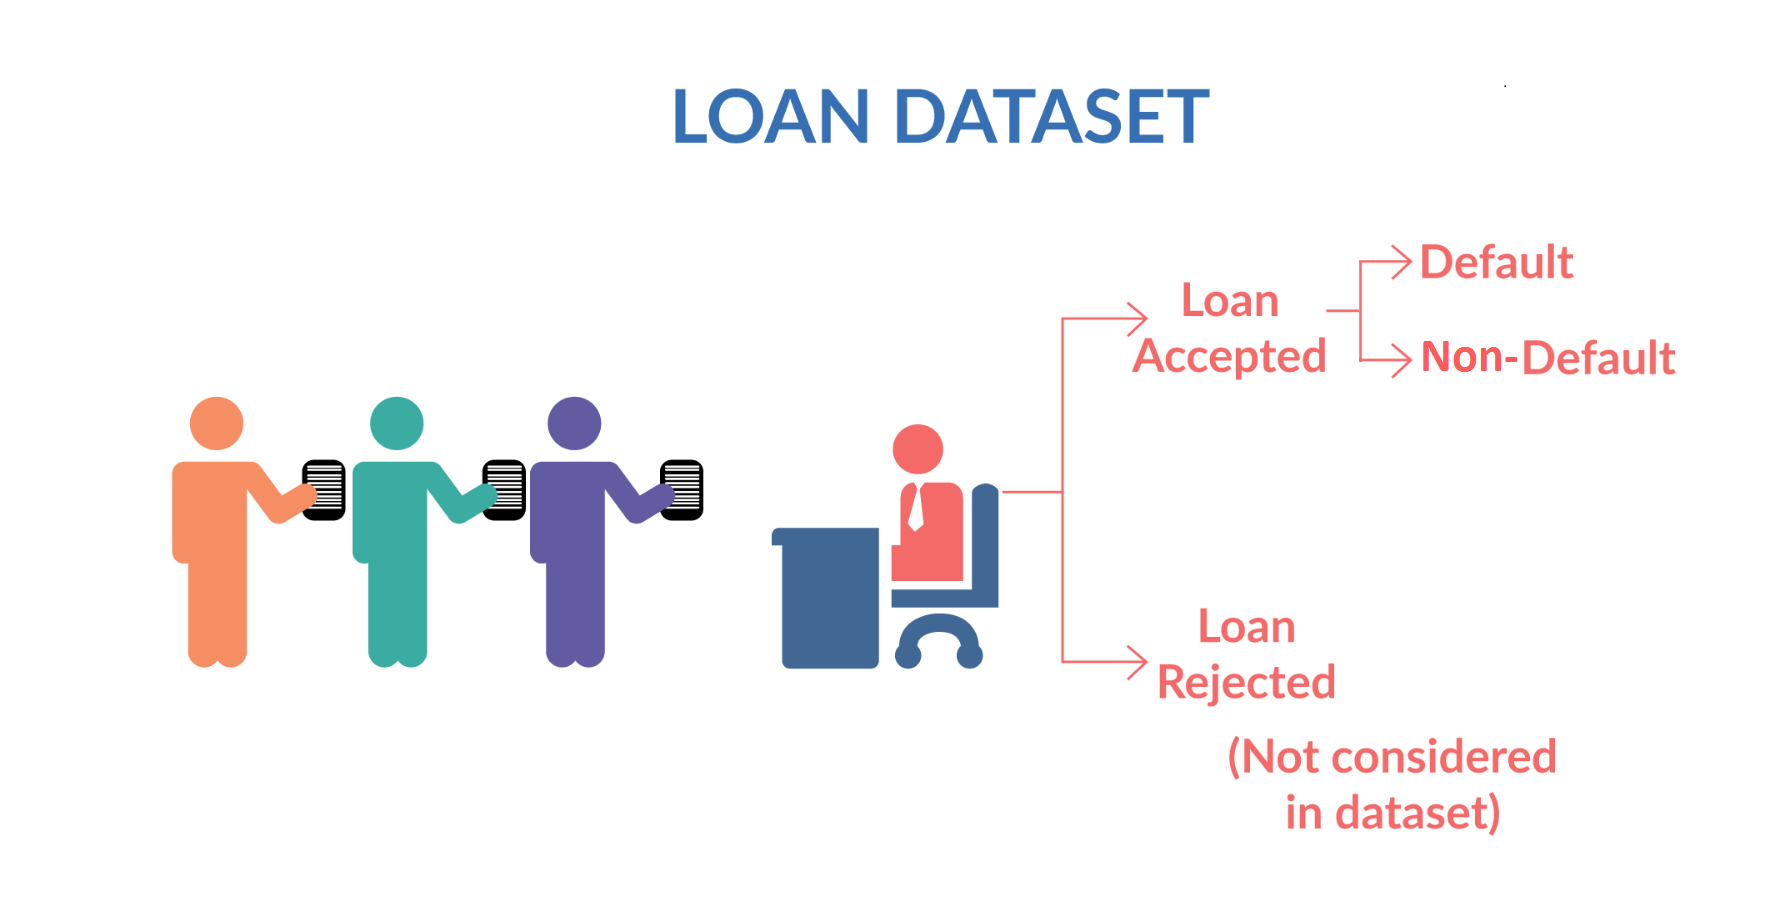

In [300]:
# Drop current customers because they don't represent either loan default or loan accepted category which is our business objective
loan = loan[loan.loan_status != "Current"]